# Credit Card Default

### Goal - Predict whether a credit card user will default on monthly credit card payment based on annual income and monthly credit card balance

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

### Load the Data


In [3]:
ccdf= pd.read_csv('dcreditcard.csv')

### View the raw data

In [4]:
ccdf.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


### Dimension of data

In [5]:
ccdf.shape

(10000, 5)

### Data Type

In [6]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


### Null value

In [7]:
ccdf.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

### Not Null

In [8]:
ccdf.notnull().sum()

Unnamed: 0    10000
default       10000
student       10000
balance       10000
income        10000
dtype: int64

## Exploratory Data analysis

### Statistical Analysis

In [9]:
pd.set_option('precision',2)
ccdf.describe()

,Unnamed: 0,balance,income
count,10000.00,10000.00,10000.00
mean,5000.50,835.37,33516.98
std,2886.90,483.71,13336.64
min,1.00,0.00,771.97
25%,2500.75,481.73,21340.46
50%,5000.50,823.64,34552.64
75%,7500.25,1166.31,43807.73
max,10000.00,2654.32,73554.23


### Analysis of Zero Values in Predictors

In [10]:
(ccdf.balance==0).sum(axis=0)

499

## Categorical Variable Analysis

In [11]:
ccdf.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

##### This confirms that the predictor student has only 2 possible values. Yes and No. The distribution of students vs non-students is given above.

## Response Variable Analysis

In [12]:
ccdf.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

##### This confirms that the response variable has only 2 possible values. Yes and No. Data is highly skewed. Only 3.33% of the individual in training data defaultde.

## Encoded Categorical Variables

In [13]:
#dummy value creation
ccdf['default2'] = ccdf.default.factorize()[0]
ccdf['student2'] = ccdf.student.factorize()[0]
ccdf.head(3)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.53,44361.63,0,0
1,2,No,Yes,817.18,12106.13,0,1
2,3,No,No,1073.55,31767.14,0,0


## Graphical Representation

In [54]:
ccdf_dfno = ccdf[ccdf.default2 == 0].sample(frac = 0.15)
ccdf_dfyes = ccdf[ccdf.default2 == 1]
ccdf_df = ccdf_dfno.append(ccdf_dfyes)

In [55]:
ccdf

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.62507,0,0
1,2,No,Yes,817.180407,12106.13470,0,1
2,3,No,No,1073.549164,31767.13895,0,0
3,4,No,No,529.250605,35704.49394,0,0
4,5,No,No,785.655883,38463.49588,0,0
...,...,...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.37891,0,0
9996,9997,No,No,757.962918,19660.72177,0,0
9997,9998,No,No,845.411989,58636.15698,0,0
9998,9999,No,No,1569.009053,36669.11236,0,0


In [15]:
print(ccdf_dfno)


      Unnamed: 0 default student  balance    income  default2  student2
6775        6776      No      No     0.00  30172.81         0         0
9686        9687      No      No  1036.77  46239.07         0         0
921          922      No      No   743.69  10774.97         0         0
8621        8622      No      No  1063.71  36475.10         0         0
7168        7169      No     Yes  1051.43   6583.87         0         1
...          ...     ...     ...      ...       ...       ...       ...
5028        5029      No      No  1112.51  44298.39         0         0
2379        2380      No      No   795.12  38710.38         0         0
4099        4100      No     Yes  1493.11  14295.66         0         1
23            24      No      No   641.98  30466.10         0         0
4467        4468      No      No     0.00  41864.26         0         0

[1450 rows x 7 columns]


In [16]:
print(ccdf_dfyes)


      Unnamed: 0 default student  balance    income  default2  student2
136          137     Yes     Yes  1487.00  17854.40         1         1
173          174     Yes     Yes  2205.80  14271.49         1         1
201          202     Yes     Yes  1774.69  20359.51         1         1
206          207     Yes      No  1889.60  48956.17         1         0
209          210     Yes     Yes  1899.39  20655.20         1         1
...          ...     ...     ...      ...       ...       ...       ...
9912        9913     Yes      No  2148.90  44309.92         1         0
9921        9922     Yes     Yes  1627.90  17547.00         1         1
9949        9950     Yes      No  1750.25  51578.94         1         0
9951        9952     Yes      No  1515.61  48688.51         1         0
9978        9979     Yes      No  2202.46  47287.26         1         0

[333 rows x 7 columns]


In [17]:
print(ccdf_df)

      Unnamed: 0 default student  balance    income  default2  student2
6775        6776      No      No     0.00  30172.81         0         0
9686        9687      No      No  1036.77  46239.07         0         0
921          922      No      No   743.69  10774.97         0         0
8621        8622      No      No  1063.71  36475.10         0         0
7168        7169      No     Yes  1051.43   6583.87         0         1
...          ...     ...     ...      ...       ...       ...       ...
9912        9913     Yes      No  2148.90  44309.92         1         0
9921        9922     Yes     Yes  1627.90  17547.00         1         1
9949        9950     Yes      No  1750.25  51578.94         1         0
9951        9952     Yes      No  1515.61  48688.51         1         0
9978        9979     Yes      No  2202.46  47287.26         1         0

[1783 rows x 7 columns]


In [56]:
%matplotlib

Using matplotlib backend: Qt5Agg


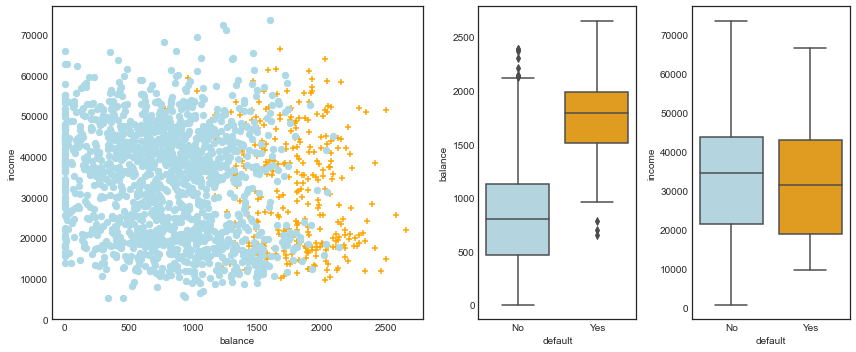

In [18]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:3])
ax3 = plt.subplot(gs[0, 3:4])
ax1.scatter(ccdf_df[ccdf_df.default == 'Yes'].balance, ccdf_df[ccdf_df.default == 'Yes'].income, s=40, c = 'orange', marker = '+')
, linewidths = '1')
ax1.scatter(ccdf_df[ccdf_df.default == 'No'].balance, ccdf_df[ccdf_df.default == 'No'].income, s=40, c = 'lightblue', marker = 'o')
, linewidths = '2', edgecolors = 'lightblue', facecolors = 'white', alpha= .6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('balance')
c_palette = {'No':'lightblue','Yes':'orange'}
sns.boxplot('default','balance',data=ccdf,orient='v',ax=ax2, palette=c_palette)
sns.boxplot('default','income',data=ccdf,orient='v',ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

##### Points are overlapping more if we select all No values therefore we are using 15% No values to get clear view of data

#### Box plot analysis -
##### 1) balance below 1500 is non defaulter , balance can be used to divide the data in classes.
##### 2) income graph is overlapping

## Logistic Regression Using sklearn

### Train data
### input data(x) -balance
### output data(y) -defaut2

### Test Data
#### Create new data varies between min and max values of balance

In [19]:
X_train = ccdf.balance.values.reshape(-1,1)
y = ccdf.default2
X_test = np.arange(ccdf.balance.min(), ccdf.balance.max()).reshape(-1,1)

In [20]:
import sklearn.linear_model as skl_lm

In [21]:
clf = skl_lm.LogisticRegression(solver = 'newton-cg')
clf.fit(X_train,y)

LogisticRegression(solver='newton-cg')

## Plotting the probability

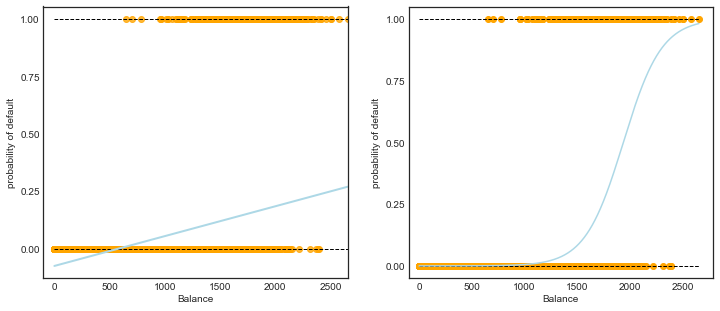

In [22]:
proba = clf.predict_proba(X_test)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,5))
sns.regplot (ccdf.balance, ccdf.default2, order=1 , ci=None , scatter_kws= {'color':'orange'}, line_kws = {'color':'lightblue', 'lw':2},ax=ax1)
ax2.scatter(X_train, y, color = 'orange')
ax2.plot(X_test, proba[:,1],color='lightblue')
for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1],linestyle = 'dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1],linestyle = 'dashed', lw=1)
    ax.set_ylabel('probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0,0.25,0.5,0.75,1.])
    ax.set_xlim(xmin=-100)

##### Left plot- Linear regression used
##### Right plot- Logistic Regression used

### Print the values of β(hat)0 and β(hat)1

In [23]:
print(clf)

LogisticRegression(solver='newton-cg')


In [24]:
print('classes:',clf.classes_)

classes: [0 1]


In [25]:
print('coefficients:', clf.coef_)

coefficients: [[0.00549892]]


In [26]:
print('intercept:',clf.intercept_)

intercept: [-10.65133019]


## Logistic regression using statesmodel X= Balance

In [27]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sms

In [28]:
pd.set_option('precision',6)

In [29]:
X_train = sm.add_constant(ccdf.balance)

In [30]:
est = sm.Logit(y.ravel(),X_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [31]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [32]:
X_train.head()

,const,balance
0,1.0,729.526495
1,1.0,817.180407
2,1.0,1073.549164
3,1.0,529.250605
4,1.0,785.655883


## Logistic Regression(Dummy Variable) Using statsmodel

In [33]:
X_train = sm.add_constant(ccdf.student2)
y = ccdf.default2
est = sms.Logit(y,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


In [34]:
print(X_train)

      const  student2
0       1.0         0
1       1.0         1
2       1.0         0
3       1.0         0
4       1.0         0
...     ...       ...
9995    1.0         0
9996    1.0         0
9997    1.0         0
9998    1.0         0
9999    1.0         1

[10000 rows x 2 columns]


In [35]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default2, Length: 10000, dtype: int64


In [36]:
print(est.summary().tables[1].as_text())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630


In [37]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630


## Multiple Logistic Regression

In [38]:
X_train = sm.add_constant(ccdf[['balance','income','student2']])
est = sms.Logit(y,X_train).fit()


Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [39]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2      -0.6468      0.236     -2.738      0.006      -1.110      -0.184


## Cofounding

### Create balance and default vectors for student

In [40]:
X_train = ccdf[ccdf.student == 'Yes'].balance.values.reshape(-1,1)
y = ccdf[ccdf.student == 'Yes'].default2

### Create balance and default vectors for non-student

In [41]:
X_train2 = ccdf[ccdf.student == 'No'].balance.values.reshape(-1,1)
y2 = ccdf[ccdf.student == 'No'].default2

### Create Test Vector

In [42]:
X_test = np.arange(ccdf.balance.min(),ccdf.balance.max()).reshape(-1,1)

In [43]:
print(X_test)

[[0.000e+00]
 [1.000e+00]
 [2.000e+00]
 ...
 [2.652e+03]
 [2.653e+03]
 [2.654e+03]]


### Fit both dataset to logistic regression

In [44]:
clf = skl_lm.LogisticRegression(solver = 'newton-cg')
clf2 = skl_lm.LogisticRegression(solver = 'newton-cg')

In [45]:
X_train

array([[817.1804066],
       [919.5885305],
       [808.6675043],
       ...,
       [999.281112 ],
       [172.4129875],
       [200.9221826]])

In [46]:
clf.fit(X_train,y)
clf2.fit(X_train2,y2)

C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression(solver='newton-cg')

### Checking Probability

In [47]:
prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

### Confusion Matrix

In [48]:
ccdf.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


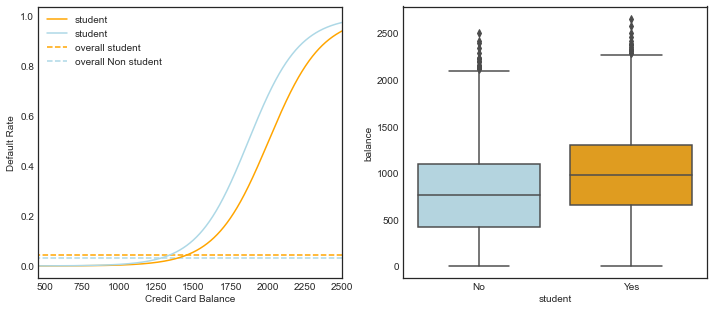

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

#left plot
ax1.plot (X_test, prob[:,1],color = 'orange',label='student')
ax1.plot (X_test, prob2[:,1],color = 'lightblue',label='student')
ax1.hlines(127/2817, colors='orange',label = 'overall student', xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1],linestyle = 'dashed')
ax1.hlines(206/6850, colors='lightblue',label = 'overall Non student', xmin=ax1.xaxis.get_data_interval()[0],xmax=ax1.xaxis.get_data_interval()[1],linestyle = 'dashed')
ax1.set_ylabel('Default Rate') 
ax1.set_xlabel('Credit Card Balance') 
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.]) 
ax1.set_xlim(450,2500) 
ax1.legend(loc=2) 
# Right plot 
sns.boxplot('student', 'balance', data=ccdf, orient='v', ax=ax2,  palette=c_palette);

## Linear Dicsriminant Analysis
### 50% threshold

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x =  ccdf[['balance','income','student2']]
y = ccdf.default2y = ccdf.default2
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(x,y).predict(x)
ccdf_df = pd.DataFrame({'True default status': y,'Predicted default status': y_pred})
ccdf_df.replace(to_replace={0:'No',1:'Yes'},inplace=True)
ccdf_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')    

<ipython-input-50-821213a3bf78>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y = ccdf.default2y = ccdf.default2


True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


### 20 % threshold

In [52]:
decision_prob = 0.2
y_prob = lda.fit(x,y).predict_proba(x)
ccdf_df = pd.DataFrame({'True default status':y,'Predicted default status':y_prob[:,1] > decision_prob})
ccdf_df.replace(to_replace={0:'No',1:'Yes','True':'Yes','False':'No'},inplace=True)
ccdf_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9435,140
Yes,232,193


### 30% Threshold

In [53]:
decision_prob = 0.3
y_prob = lda.fit(x,y).predict_proba(x)
ccdf_df = pd.DataFrame({'True default status':y,'Predicted default status':y_prob[:,1] > decision_prob})
ccdf_df.replace(to_replace={0:'No',1:'Yes','True':'Yes','False':'No'},inplace=True)
ccdf_df.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9571,181
Yes,96,152
